## COVID-19 Daily Analysis Table  
  - source:  official data collected by John Hopkins, Stats by Country,  https://github.com/CSSEGISandData/ 
  - worst daily deaths by country evaluating last 7 days
  - charts:  https://dasn.herokuapp.com/covidzoom compare, and https://dasn.herokuapp.com/covid19
  - SUMMARY WARNING ON COUNTRIES BY COVID DAILY DEATH RATES 

In [1]:
try:  ## This table sumarizes the daily deaths by country (calculations below)   %store df9  
    display(df9.transpose().tail(3) )
    print("worst daily deaths by country evaluating last 7 days:")
    display(df9.transpose().tail(9).head(9).mean(axis=0).sort_values(ascending=False).head(7) )
except NameError:
    print("Click Run on this cell only after the RUN ALL completes all calculations")

Click Run on this cell only after the RUN ALL completes all calculations


### How is this daily Calculus performed :   https://github.com/infchg/COVID-19
  - calculations in iPython at  https://github.com/infchg/COVID-19/JH-calculate-daily.ipynb
  - source data https://github.com/CSSEGISandData/COVID-19/
  - resources thanks to  http://Jupyter.org  http://MyBinder.org  http://Heroku.com

In [2]:
!pip install pandas seaborn
# initial installations 

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 10.0 MB 2.9 MB/s eta 0:00:01    |▏                               | 51 kB 2.2 MB/s eta 0:00:05     |██▍                             | 757 kB 2.9 MB/s eta 0:00:04     |█████▍                          | 1.7 MB 2.9 MB/s eta 0:00:03     |███████▌                        | 2.3 MB 2.9 MB/s eta 0:00:03
     |████████████████████████████████| 215 kB 24.1 MB/s eta 0:00:01
     |████████████████████████████████| 510 kB 60.5 MB/s eta 0:00:01
     |████████████████████████████████| 20.2 MB 34.4 MB/s eta 0:00:01    |█▋                              | 983 kB 34.4 MB/s eta 0:00:01     |███████▍                        | 4.6 MB 34.4 MB/s eta 0:00:01     |████████████▍                   | 7.8 MB 34.4 MB/s eta 0:00:01     |████████████████████▎           | 12.8 MB 34.4 MB/s eta 0:00:01


In [3]:
 ##JH Source THIS IS THE SOURCE OF ALL CALCULATIONS IN THIS PAGE
! curl -OL https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   213  100   213    0     0    968      0 --:--:-- --:--:-- --:--:--   968
100 69256  100 69256    0     0   208k      0 --:--:-- --:--:-- --:--:--  208k


In [4]:
# ! egrep -e ',[0-9]{3,}$' -e ^Provi  -e ',[6-9].$' tim*dea*csv > over50.csv
! egrep -e ',[^,][^,][^,]+$' -e ^Provi   tim*dea*csv > over50.csv
import pandas as pd
df=pd.read_csv('over50.csv')
df.set_index('Country/Region',inplace=True)  # .T
type(df)

pandas.core.frame.DataFrame

In [5]:
cols20 = df.columns[-13:].tolist()
idx = cols20 # cols21 = df.columns[-14:-1].tolist()
#display( )idx=['Country/Region']+cols20   #no need with set index
display(df.sort_values(by=[df.columns[-1]],ascending=False)[cols20] )

,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20
Country/Region,,,,,,,,,,,,,
US,42659,45086,47412,49724,51493,53755,54881,56259,58355,60967,62996,64943,66369
Italy,24114,24648,25085,25549,25969,26384,26644,26977,27359,27682,27967,28236,28710
United Kingdom,19051,20223,21060,21787,22792,23635,24055,24393,25302,26097,26771,27510,28131
Spain,20852,21282,21717,22157,22524,22902,23190,23521,23822,24275,24543,24543,25100
France,20240,20765,21309,21825,22214,22583,22825,23262,23629,24056,24345,24563,24729
Belgium,5828,5998,6262,6490,6679,6917,7094,7207,7331,7501,7594,7703,7765
Germany,4862,5033,5279,5575,5760,5877,5976,6126,6314,6467,6623,6736,6812
Brazil,2587,2741,2906,3331,3704,4057,4286,4603,5083,5513,6006,6412,6761
Iran,5209,5297,5391,5481,5574,5650,5710,5806,5877,5957,6028,6091,6156


In [6]:
#df['LastDay']=df[df.columns[-1]]-df[df.columns[-2]] 
df0=df[idx].copy()  #()
type(df)
#for (coln, cold) in df.iteritems():
#    print(coln, '->', cold)
for i in range(1,13):
         df0[df0.columns[-i]] =    (df0[df.columns[-i]]-df0[df0.columns[-i-1]]) # casualties last day

## COVID Daily deaths 
Spain Italy US France UK Netherlands Iran Germany (updated March-30th)   

In [7]:
df0.pop( df0.columns[0] )   # 0 
df9=df0.sort_values(by=[df.columns[-1]],ascending=False).head(16)
display(df9) 

,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20
Country/Region,,,,,,,,,,,,
US,2427,2326,2312,1769,2262,1126,1378,2096,2612,2029,1947,1426
United Kingdom,1172,837,727,1005,843,420,338,909,795,674,739,621
Spain,430,435,440,367,378,288,331,301,453,268,0,557
Italy,534,437,464,420,415,260,333,382,323,285,269,474
Brazil,154,165,425,373,353,229,317,480,430,493,406,349
Ecuador,13,17,23,16,0,0,87,208,12,17,163,308
France,525,544,516,389,369,242,437,367,427,289,218,166
Canada,105,90,109,97,106,70,84,83,79,97,163,114
India,53,36,40,59,45,56,58,69,71,75,69,100


In [8]:
print(','.join('Mr%.0f' %x for x in range(18,30+1))  ,'\ndata-datasets="')
print('"\ndata-datasets="'.join(','.join('%.0f' %x for x in y) for y in df9.values) )

Mr18,Mr19,Mr20,Mr21,Mr22,Mr23,Mr24,Mr25,Mr26,Mr27,Mr28,Mr29,Mr30 
data-datasets="
2427,2326,2312,1769,2262,1126,1378,2096,2612,2029,1947,1426"
data-datasets="1172,837,727,1005,843,420,338,909,795,674,739,621"
data-datasets="430,435,440,367,378,288,331,301,453,268,0,557"
data-datasets="534,437,464,420,415,260,333,382,323,285,269,474"
data-datasets="154,165,425,373,353,229,317,480,430,493,406,349"
data-datasets="13,17,23,16,0,0,87,208,12,17,163,308"
data-datasets="525,544,516,389,369,242,437,367,427,289,218,166"
data-datasets="105,90,109,97,106,70,84,83,79,97,163,114"
data-datasets="53,36,40,59,45,56,58,69,71,75,69,100"
data-datasets="165,138,123,112,120,66,43,48,145,84,98,94"
data-datasets="145,113,99,152,84,46,83,135,163,127,113,89"
data-datasets="119,117,115,109,106,99,95,92,89,93,84,78"
data-datasets="39,46,42,62,66,28,54,72,89,108,73,76"
data-datasets="171,246,296,185,117,99,150,188,153,156,113,76"
data-datasets="88,94,90,93,76,60,96,71,80,71,63,65"
data-datasets="170,264,228,189,23

In [9]:
dxy=df0.transpose()
display(dxy.tail(4)) #pivot('Country/Region')

Country/Region,Algeria,Argentina,Austria,Bangladesh,Belgium,Brazil,Canada,Canada,Canada,Chile,...,Serbia,South Africa,Spain,Sweden,Switzerland,Turkey,Ukraine,United Arab Emirates,United Kingdom,US
4/29/20,7,7,11,8,170,430,3,81,79,9,...,5,10,453,107,17,89,11,9,795,2612
4/30/20,6,4,4,5,93,493,2,52,97,11,...,6,0,268,124,21,93,11,7,674,2029
5/1/20,3,7,5,2,109,406,1,60,163,7,...,0,13,0,67,17,84,11,6,739,1947
5/2/20,6,12,7,5,62,349,2,27,114,13,...,10,7,557,16,8,78,7,8,621,1426


In [10]:
#Worst 7 countries in daily deaths last week 
df9.transpose().tail(8).head(7).mean(axis=0).sort_values(ascending=False).head(7)    #1 Average for each row :

Country/Region
US                1921.428571
United Kingdom     674.000000
Brazil             386.857143
France             335.571429
Italy              323.857143
Spain              288.428571
Belgium            146.285714
dtype: float64

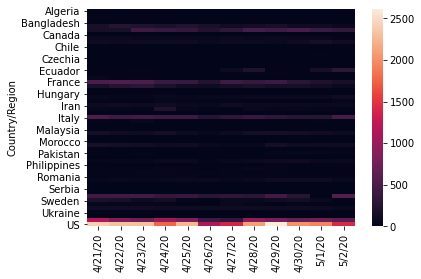

In [11]:
import seaborn as sns
%matplotlib inline
sns.heatmap(df0)#, annot=True

###  Daily casualties Heat Map 
   in order of daily casualties : Italy Spain US France UK Iran Netherlands 

55 10.5


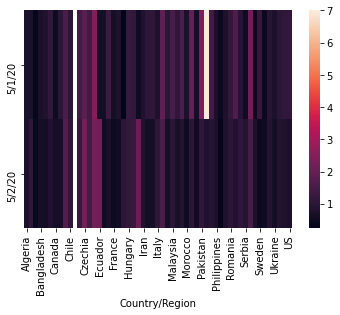

In [12]:
print( len(dxy.columns) ,dxy['Austria'].tail(20).mean() ) #   with ()   sns.heatmap(dxy)
drel=dxy.copy()
for r in drel.columns:
    #print (r,    drel[r].tail(5).mean() )
    drel[r] =  drel[r] / drel[r].tail(11).mean()
    
dinc=df0.copy()  #increase 
Days2 = dxy.tail(2).mean() 
Days4 = dxy.tail(5).head(2).mean() 
increaserate=round(Days2/Days4,1)
#display( increaserate )
   
for i in range(1,6):
         dinc[df0.columns[-i]] =    (df0[df0.columns[-i]]+df0[df0.columns[-i-1]])  /  (df0[df0.columns[-i-4]]+df0[df0.columns[-i-3]])  
        
sns.heatmap(dinc.transpose().tail(2))    

In [13]:
print("By worst aspect due exponential increase: Sweden UK US Belgium Germany \n Strangely constant : Iran , Recovered: China ")
#drel.loc[['3/27/20']].transpose().sort_values(by=[df.columns[-1]],ascending=False)
drel.iloc[[-1]].transpose().sort_values(by=[df.columns[-1]],ascending=False)

By worst aspect due exponential increase: Sweden UK US Belgium Germany 
 Strangely constant : Iran , Recovered: China 


,5/2/20
Country/Region,
Ecuador,3.981199
Serbia,1.864407
Dominican Republic,1.765432
India,1.622419
Spain,1.604767
Philippines,1.590361
Indonesia,1.586047
Denmark,1.571429
Greece,1.500000


In [14]:
%matplotlib inline
#dxy.plot(xticks=dxy.index,yticks=dxy.Austria)

In [15]:
!pip install chart-studio urllib3 # plotly

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 64 kB 1.7 MB/s eta 0:00:011
     |████████████████████████████████| 7.1 MB 10.5 MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=4c432bf366839316d612e19bb351cc6d0000d9ccd5a2f0a789c892e7b60eaf28
  Stored in directory: /home/jovyan/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
